Load Libraries

In [2]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1

Import Modules

Gym for the Game

Matplotlib for drawing

IPython for drawing

Karas for Learning

In [3]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display

from keras.models     import Sequential
from keras.layers     import Dense
from keras.optimizers import Adam


Start display so we can show the cart pole game

In [4]:

display = Display(visible=0, size=(400, 300))
display.start()

Inialize Variables

In [5]:
env = gym.make('CartPole-v1')
env.reset()
goalSteps = 500
scoreRequirement = 60
intialGames = 10000

Module to display the Cart Pole game

In [6]:
def showCartPole():
        screen = env.render(mode='rgb_array')
        plt.imshow(screen)
        ipythondisplay.clear_output(wait=True)
        ipythondisplay.display(plt.gcf())


Modeule to play random game

In [8]:
def playRandomGame():
    #reset environment
    env.reset()

    #set up display
    prevScreen = env.render(mode='rgb_array')
    plt.imshow(prevScreen)

    #Play game
    for step in range(goalSteps):

        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)

        #Show the cart pole
        showCartPole()

        #Show stats
        print("Step:        {}".format(step))
        print("action:      {}".format(action))
        print("observation: {}".format(observation))
        print("reward:      {}".format(reward))
        print("done:        {}".format(done))
        print("info:        {}".format(info))

        #If we are finised exit routine
        if done:
            break

    #Clean up
    env.reset()
    ipythondisplay.clear_output(wait=True)
    env.close()

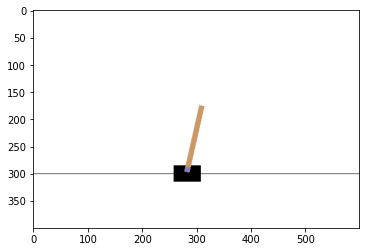

In [9]:
playRandomGame()

Module to create training data

In [10]:
def modelData():

    #init variables
    trainingData = []
    scores = []

    #Play Games
    for gameIndex in range(intialGames):
        score = 0
        gameMemory = []
        previousObservation = []

        #Game Turns
        for index in range(goalSteps):
            action = random.randrange(0, 2)
            observation, reward, done, info = env.step(action)
            
            if len(previousObservation) > 0:
                gameMemory.append([previousObservation, action])
                
            previousObservation = observation
            score += reward

            #Can we stop
            if done:
                break

        #Did we reach the required score
        if score >= scoreRequirement:
            scores.append(score)
            for data in gameMemory:
                if data[1] == 1:
                    output = [0, 1]
                elif data[1] == 0:
                    output = [1, 0]
                trainingData.append([data[0], output])
        
        #Clean up
        env.reset()

    print(scores)
    
    return trainingData

In [11]:
trainingData = modelData()

[104.0, 65.0, 66.0, 60.0, 71.0, 82.0, 96.0, 95.0, 103.0, 75.0, 65.0, 60.0, 62.0, 61.0, 79.0, 72.0, 64.0, 66.0, 68.0, 88.0, 60.0, 61.0, 61.0, 62.0, 88.0, 73.0, 62.0, 61.0, 61.0, 65.0, 64.0, 60.0, 64.0, 68.0, 74.0, 73.0, 67.0, 91.0, 70.0, 66.0, 80.0, 60.0, 84.0, 64.0, 84.0, 68.0, 66.0, 89.0, 67.0, 64.0, 63.0, 64.0, 77.0, 86.0, 66.0, 67.0, 63.0, 69.0, 69.0, 62.0, 71.0, 71.0, 90.0, 63.0, 71.0, 61.0, 71.0, 60.0, 61.0, 60.0, 83.0, 61.0, 64.0, 62.0, 60.0, 76.0, 70.0, 62.0, 60.0, 77.0, 62.0, 62.0, 66.0, 63.0, 65.0, 67.0, 60.0, 60.0, 63.0, 60.0, 78.0, 71.0, 68.0, 60.0, 75.0, 61.0, 77.0, 60.0, 63.0, 67.0, 68.0, 65.0, 71.0, 87.0, 69.0, 63.0, 63.0, 63.0, 136.0, 71.0, 71.0, 66.0, 63.0, 62.0, 82.0, 60.0, 63.0, 65.0, 76.0, 86.0, 98.0, 81.0, 76.0, 69.0, 62.0, 67.0, 60.0, 69.0, 60.0, 69.0, 96.0, 63.0, 66.0, 60.0, 65.0, 62.0, 64.0, 63.0, 65.0, 70.0, 67.0, 60.0, 71.0, 81.0, 64.0, 61.0, 80.0, 65.0, 61.0, 74.0, 60.0, 69.0, 68.0, 73.0, 61.0, 68.0, 62.0, 63.0, 102.0, 69.0, 75.0, 81.0, 86.0, 62.0, 75.0, 65.0,

Module to construct the model to play the game

In [12]:
def buildModel(inputSize, outputSize):
    model = Sequential()
    model.add(Dense(256, input_dim=inputSize, activation='relu'))
    model.add(Dense(52, activation='relu'))
    model.add(Dense(outputSize, activation='linear'))
    model.compile(loss='mse', optimizer=Adam())

    return model

Module to train the model to play the game

In [13]:

def trainModel(trainingData):
    X = np.array([i[0] for i in trainingData]).reshape(-1, len(trainingData[0][0]))
    y = np.array([i[1] for i in trainingData]).reshape(-1, len(trainingData[0][1]))
    model = buildModel(inputSize=len(X[0]), outputSize=len(y[0]))
    
    model.fit(X, y, epochs=20)
    return model

In [14]:
trainModel = trainModel(trainingData)

Epoch 1/20
383/383 [==============================] - 1s 2ms/step - loss: 0.2461
Epoch 2/20
383/383 [==============================] - 1s 2ms/step - loss: 0.2351
Epoch 3/20
383/383 [==============================] - 1s 2ms/step - loss: 0.2337
Epoch 4/20
383/383 [==============================] - 1s 2ms/step - loss: 0.2326
Epoch 5/20
383/383 [==============================] - 1s 2ms/step - loss: 0.2328
Epoch 6/20
383/383 [==============================] - 1s 2ms/step - loss: 0.2319
Epoch 7/20
383/383 [==============================] - 1s 2ms/step - loss: 0.2321
Epoch 8/20
383/383 [==============================] - 1s 2ms/step - loss: 0.2317
Epoch 9/20
383/383 [==============================] - 1s 2ms/step - loss: 0.2312
Epoch 10/20
383/383 [==============================] - 1s 2ms/step - loss: 0.2311
Epoch 11/20
383/383 [==============================] - 1s 2ms/step - loss: 0.2312
Epoch 12/20
383/383 [==============================] - 1s 2ms/step - loss: 0.2305
Epoch 13/20
383/383 [====

Run simulation

In [ ]:
#Init variables
scores = []
choices = []
i = 0

#process all the games
for eachGame in range(100):
    #Give feed back to screen to see what is happening
    i = i + 1
    print(i)

    #Track score and observation
    score = 0
    previousObservastions = []

    for index in range(goalSteps):

        showCartPole()

        if len(previousObservastions)==0:
            action = random.randrange(0,2)
        else:
            action = np.argmax(trainModel.predict(previousObservastions.reshape(-1, len(previousObservastions)))[0])
        
        choices.append(action)
        newOobservation, reward, done, info = env.step(action)
        previousObservastions = newOobservation
        score = score + reward

        #can we exit
        if done:
            break

    #Finished game log score, reset enviornment
    env.reset()
    scores.append(score)

    #Give feed back to screen and show score
    print(i, score)

#Shoow all scores and average
print(scores)
print('Average Score:',sum(scores)/len(scores))


1


In [ ]:
display.stop()